In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score


from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist

# 1. Load the dataset 

In [2]:
#select 5000 rows
df = pd.read_csv('blogtext.csv', nrows= 5000)
df.sample(5)

,id,gender,age,topic,sign,date,text
44,3581210,male,33,InvestmentBanking,Aquarius,"13,July,2004",Koreans have an interesting sayin...
4888,1103575,female,17,indUnk,Scorpio,"21,January,2003",I'm exhausted... I was at church babysi...
4325,766556,female,34,indUnk,Sagittarius,"17,March,2003",Thanks urlLink Fred Just in case y...
4200,766556,female,34,indUnk,Sagittarius,"20,November,2002",
484,3022585,female,27,Education,Aquarius,"01,August,2004",My name is Anna and I reside in the old...


# 2. Preprocess rows of the “text” column 
#### a. Remove unwanted characters
#### b. Convert text to lowercase
#### c. Remove unwanted spaces
#### d. Remove stopwords

In [3]:
words = set(nltk.corpus.words.words())

In [4]:
def normalizer(blogs):
    blogs = " ".join(filter(lambda x: x[0]!= '@' , blogs.split()))
    blogs = re.sub('[^a-zA-Z]', ' ', blogs)
    blogs = blogs.lower()
    blogs = re.sub(' +', ' ', blogs).strip()
    blogs = blogs.split()
    blogs = [word for word in blogs if not word in set(stopwords.words('english'))]
    blogs = [lemma.lemmatize(word) for word in blogs]
    
    blogs = " ".join(blogs)
    return blogs

In [5]:
df['normalized_text'] = df.text.apply(normalizer)

In [6]:
df.head()

,id,gender,age,topic,sign,date,text,normalized_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found page mb pdf file wait untill team l...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team member drewes van der laag urllink mail r...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popups mean s...


In [7]:
# Remove Non-English Words from Normalized text
def remove_non_english_words(blog):
    return " ".join(w for w in nltk.wordpunct_tokenize(blog) if w.lower() in words or not w.isalpha())

df['normalized_text'] = df.normalized_text.apply(remove_non_english_words)

In [8]:
df.head()

,id,gender,age,topic,sign,date,text,normalized_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",found page file wait untill team leader
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team member van mail mail mail
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het van build h bomb humor subject build h bom...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo capture mean show cool link pop k...


####  Word Cloud of all the normlized text

In [9]:
# all tweets 
all_words = " ".join(df.normalized_text)

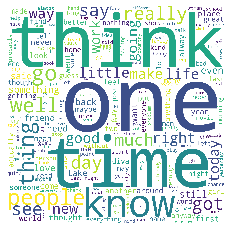

In [10]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

#### a. Label columns to merge: “gender”, “age”, “topic”, “sign”

In [11]:
##  create another dataframe dfT having only the columns needed for creating label
dfT=df[['gender', 'age', 'topic', 'sign']]

In [12]:
## Convert age from int type into String
dfT['age']=dfT['age'].astype('str')

In [13]:
## Create a 2D Matrix 'm' which is list of list contaning 'gender', 'age', 'topic', 'sign' for each row
m=[]                              # 2D Matrix having list of list
for i in range(dfT.shape[0]):
    g=[]                          # 1D list of 'gender', 'age', 'topic', 'sign'
    for j in range(dfT.shape[1]):
        g.append(dfT.iloc[i][j])
    m.append(g)

In [14]:
#Add a column called labels
df['labels']=m

In [15]:
df.head()

,id,gender,age,topic,sign,date,text,normalized_text,labels
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",found page file wait untill team leader,"[male, 15, Student, Leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team member van mail mail mail,"[male, 15, Student, Leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het van build h bomb humor subject build h bom...,"[male, 15, Student, Leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo capture mean show cool link pop k...,"[male, 33, InvestmentBanking, Aquarius]"


#### b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [16]:
final_df = df[['normalized_text', 'labels']]

In [17]:
final_df.head()

,normalized_text,labels
0,found page file wait untill team leader,"[male, 15, Student, Leo]"
1,team member van mail mail mail,"[male, 15, Student, Leo]"
2,het van build h bomb humor subject build h bom...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo capture mean show cool link pop k...,"[male, 33, InvestmentBanking, Aquarius]"


In [18]:
# Lets Check Distribution of Labels
final_df['labels'].astype('str').value_counts()

['male', '35', 'Technology', 'Aries']        2294
['female', '34', 'indUnk', 'Sagittarius']     532
['female', '24', 'indUnk', 'Scorpio']         191
['female', '15', 'Student', 'Libra']          131
['male', '24', 'Engineering', 'Libra']        119
                                             ... 
['male', '25', 'Non-Profit', 'Capricorn']       1
['female', '33', 'indUnk', 'Sagittarius']       1
['female', '23', 'indUnk', 'Aquarius']          1
['female', '27', 'Education', 'Gemini']         1
['female', '36', 'Student', 'Gemini']           1
Name: labels, Length: 96, dtype: int64

In [19]:
## Check for Null Values
final_df.isna().sum()

normalized_text    0
labels             0
dtype: int64

In [20]:
# No Null Values

# 4. Separate features and labels, and split the data into training and testing 

In [21]:
X = final_df['normalized_text']
y = final_df['labels']

In [22]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

# 5. Vectorize the features 
#### a. Create a Bag of Words using count vectorizer
#### i. Use ngram_range=(1, 2)
##### ii. Vectorize training and testing features


In [23]:
# Consider only those rows which occur more than 15% and less than 80 %, also restrict features to 100

vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.15, max_df = 0.8, max_features = 100)

In [24]:
# transform the X data to document_term_matrix

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<3750x24 sparse matrix of type '<class 'numpy.int64'>'
	with 17889 stored elements in Compressed Sparse Row format>

In [25]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

['back', 'day', 'get', 'go', 'going', 'good', 'got', 'know', 'last', 'like']

##### b. Print the term-document matrix

##### Train Document Term Matrix

In [26]:

print(X_train_dtm )

  (1, 22)	1
  (1, 20)	1
  (1, 7)	1
  (1, 2)	1
  (1, 17)	1
  (3, 20)	2
  (3, 7)	3
  (3, 17)	2
  (3, 3)	3
  (3, 0)	1
  (3, 18)	4
  (3, 5)	3
  (3, 9)	4
  (3, 10)	1
  (3, 21)	1
  (3, 14)	1
  (3, 1)	1
  (3, 12)	4
  (4, 2)	2
  (4, 3)	1
  (4, 5)	2
  (4, 9)	2
  (4, 21)	1
  (4, 6)	4
  (4, 8)	2
  :	:
  (3742, 8)	1
  (3742, 13)	1
  (3743, 2)	1
  (3743, 17)	1
  (3743, 21)	1
  (3743, 19)	1
  (3743, 15)	1
  (3745, 1)	1
  (3746, 22)	1
  (3746, 3)	2
  (3746, 0)	1
  (3746, 5)	1
  (3746, 9)	1
  (3746, 21)	1
  (3746, 1)	5
  (3746, 6)	1
  (3746, 19)	1
  (3746, 11)	1
  (3747, 17)	1
  (3747, 18)	1
  (3747, 6)	1
  (3748, 20)	2
  (3748, 9)	3
  (3749, 11)	1
  (3749, 16)	1


In [27]:
# examine vocabulary and document term matrix together
pd.DataFrame(X_train_dtm.toarray(), columns = vectorizer.get_feature_names())


,back,day,get,go,going,good,got,know,last,like,...,really,right,say,see,thing,think,time,way,well,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,3,0,3,0,3,0,4,...,1,0,0,2,4,0,2,1,0,0
4,0,0,2,1,1,2,4,0,2,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3746,1,5,0,2,0,1,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0
3747,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3748,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,2,0,0,0


##### Test Document Term Matrix

In [28]:

print(X_train_dtm )

  (1, 22)	1
  (1, 20)	1
  (1, 7)	1
  (1, 2)	1
  (1, 17)	1
  (3, 20)	2
  (3, 7)	3
  (3, 17)	2
  (3, 3)	3
  (3, 0)	1
  (3, 18)	4
  (3, 5)	3
  (3, 9)	4
  (3, 10)	1
  (3, 21)	1
  (3, 14)	1
  (3, 1)	1
  (3, 12)	4
  (4, 2)	2
  (4, 3)	1
  (4, 5)	2
  (4, 9)	2
  (4, 21)	1
  (4, 6)	4
  (4, 8)	2
  :	:
  (3742, 8)	1
  (3742, 13)	1
  (3743, 2)	1
  (3743, 17)	1
  (3743, 21)	1
  (3743, 19)	1
  (3743, 15)	1
  (3745, 1)	1
  (3746, 22)	1
  (3746, 3)	2
  (3746, 0)	1
  (3746, 5)	1
  (3746, 9)	1
  (3746, 21)	1
  (3746, 1)	5
  (3746, 6)	1
  (3746, 19)	1
  (3746, 11)	1
  (3747, 17)	1
  (3747, 18)	1
  (3747, 6)	1
  (3748, 20)	2
  (3748, 9)	3
  (3749, 11)	1
  (3749, 16)	1


In [29]:
# examine vocabulary and document term matrix together
pd.DataFrame(X_test_dtm.toarray(), columns = vectorizer.get_feature_names())

,back,day,get,go,going,good,got,know,last,like,...,really,right,say,see,thing,think,time,way,well,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,2,2,1,2,0,3,0,2,...,4,0,0,1,0,3,1,0,2,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,1,1,1,0,0,0,0,2,0,2,...,0,0,0,0,0,3,0,0,1,3
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points)

In [30]:
dfT = df[['gender', 'age', 'topic', 'sign']]

In [31]:
dfT['age'] = dfT['age'].astype('str')

In [32]:
keys=[] 
values=[] 

for i in range(dfT.shape[1]): # iterate through all the colummns        
    for j in range(dfT.iloc[:,i].value_counts().shape[0]): # iterate through all the rows of value_counts of that column
        keys.append(dfT.iloc[:,i].value_counts().index[j])         
        values.append(dfT.iloc[:,i].value_counts().iloc[j])

In [33]:
dictionary = dict(zip(keys,values))

In [34]:
print(dictionary)

{'male': 3294, 'female': 1706, '35': 2307, '34': 540, '24': 353, '15': 339, '17': 331, '25': 268, '14': 170, '23': 137, '33': 101, '26': 96, '27': 86, '39': 79, '16': 67, '36': 60, '37': 19, '45': 14, '41': 14, '42': 9, '46': 7, '44': 3, 'Technology': 2332, 'indUnk': 1381, 'Student': 569, 'Engineering': 119, 'Education': 118, 'BusinessServices': 87, 'Sports-Recreation': 75, 'InvestmentBanking': 70, 'Communications-Media': 61, 'Non-Profit': 47, 'Science': 33, 'Arts': 31, 'Internet': 20, 'Consulting': 16, 'Banking': 16, 'Automotive': 14, 'Religion': 4, 'Law': 3, 'Accounting': 2, 'Museums-Libraries': 2, 'Aries': 2483, 'Sagittarius': 704, 'Libra': 414, 'Scorpio': 408, 'Aquarius': 329, 'Leo': 190, 'Taurus': 100, 'Cancer': 94, 'Gemini': 86, 'Capricorn': 84, 'Pisces': 67, 'Virgo': 41}


# 7. Transform the labels - (7.5 points)
As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn

#### a. Convert your train and test labels using MultiLabelBinarizer

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer(classes=sorted(dictionary.keys()))
y_train_mlb = mlb.fit_transform(y_train)
y_test_mlb = mlb.transform(y_test)

In [36]:
y_train_mlb[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [37]:
y_test_mlb[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

##### Lets verify one single row of train set after MLB conversion

In [38]:
y_train.iloc[1]

['female', '34', 'indUnk', 'Scorpio']

In [39]:
mlb.inverse_transform(y_train_mlb)[1]

('34', 'Scorpio', 'female', 'indUnk')

##### Result as expected

# 8. Choose a classifier 


In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train_mlb)
y_pred_ovr_test = ovr.predict(X_test_dtm)
#y_proba_ovr = ovr.predict_proba(X_test_dtm)
y_pred_ovr_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [41]:
y_pred_ovr_train = ovr.predict(X_train_dtm)
y_pred_ovr_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# 9. Fit the classifier, make predictions and get the accuracy 


In [42]:
def print_scores(actual, predicted, averaging_type):
    print('\nAVERAGING TYPE==> ',averaging_type)
    print('F1 score: ',f1_score(actual,predicted, average=averaging_type))
    print('Average Precision Score: ',average_precision_score(actual,predicted, average=averaging_type))
    print('Average Recall Score: ',recall_score(actual,predicted, average=averaging_type))

##### Train Score

In [43]:
print('--------------------------TRAIN SCORES--------------------------------')
print('Accuracy score: ',accuracy_score(y_train_mlb, y_pred_ovr_train))
print_scores(y_train_mlb, y_pred_ovr_train, 'micro')
print_scores(y_train_mlb, y_pred_ovr_train, 'macro')
print_scores(y_train_mlb, y_pred_ovr_train, 'weighted')

--------------------------TRAIN SCORES--------------------------------
Accuracy score:  0.38986666666666664

AVERAGING TYPE==>  micro
F1 score:  0.5685775928494375
Average Precision Score:  0.36895768461049583
Average Recall Score:  0.49193333333333333

AVERAGING TYPE==>  macro
F1 score:  0.10747546215510458
Average Precision Score:  0.10090696485017575
Average Recall Score:  0.09339210391661229

AVERAGING TYPE==>  weighted
F1 score:  0.45708857413713727
Average Precision Score:  0.4273097768987276
Average Recall Score:  0.49193333333333333


##### Test Scores

In [44]:
print('--------------------------TEST SCORES--------------------------------')
print('Accuracy score: ',accuracy_score(y_test_mlb, y_pred_ovr_test))
print_scores(y_test_mlb, y_pred_ovr_test, 'micro')
print_scores(y_test_mlb, y_pred_ovr_test, 'macro')
print_scores(y_test_mlb, y_pred_ovr_test, 'weighted')

--------------------------TEST SCORES--------------------------------
Accuracy score:  0.3824

AVERAGING TYPE==>  micro
F1 score:  0.5630107031879388
Average Precision Score:  0.3622022308565003
Average Recall Score:  0.4892

AVERAGING TYPE==>  macro
F1 score:  0.08745179613819724
Average Precision Score:  0.09071295299532253
Average Recall Score:  0.08328042218666373

AVERAGING TYPE==>  weighted
F1 score:  0.45453659955481196
Average Precision Score:  0.4256337602186105
Average Recall Score:  0.4892


# 10. Print true label and predicted label for any five examples

In [45]:
five_pred = y_pred_ovr_test[:5]
five_actual = y_test_mlb[:5]

In [46]:
five_actual = mlb.inverse_transform(five_actual)
five_actual

[('15', 'Aquarius', 'Student', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('15', 'Libra', 'Student', 'female'),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male')]

In [47]:
five_pred = mlb.inverse_transform(five_pred)
five_pred

[('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('female',),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male')]